In [ ]:
#Shoun Abraham
#Used code from https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [6]:
df = pd.read_csv('pca_results.csv', index_col = 0)
df.head()

,0,1,2,3,4,5,6,7,8,9,Class
1,-2102.286221,32.931356,3.361919,-0.657775,-0.876986,0.560159,-0.189341,-0.166657,-0.265185,0.381197,1
2,2679.802949,-17.319784,-17.054354,1.179895,1.268521,-0.662220,0.024507,-0.396524,0.466224,1.076485,0
3,-1175.275741,14.440874,3.268932,0.562049,0.884034,0.656517,0.170322,0.688417,0.671184,0.577163,1
4,4610.783164,7.124193,-10.215333,-0.580810,1.235284,-0.819677,0.287341,0.731074,-1.062652,0.667411,1
5,1598.746935,17.200115,-1.985796,-0.818432,0.166598,-0.259442,1.215347,0.524174,-0.888239,0.443293,0


In [8]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd

In [10]:
cols = ["0", "1", "2", "3", "4", 
        "5", "6", "7", "8", "9"]
X = df[cols]
y = df['Class']


In [12]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.511862
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      990
Method:                           MLE   Df Model:                            9
Date:                Tue, 01 May 2018   Pseudo R-squ.:                  0.1621
Time:                        15:12:26   Log-Likelihood:                -511.86
converged:                       True   LL-Null:                       -610.86
                                        LLR p-value:                 8.680e-38
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0001   2.91e-05     -5.057      0.000      -0.000   -9.03e-05
1              0.0262      0.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
#Accuracy of train/test split 70/30
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [18]:
#K Folds Cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.806


In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 57  29]
 [ 27 187]]


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.68      0.66      0.67        86
          1       0.87      0.87      0.87       214

avg / total       0.81      0.81      0.81       300



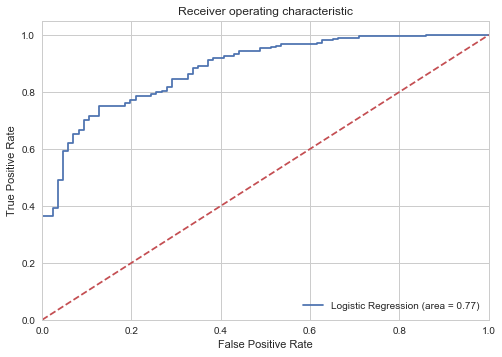

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()